In [1]:
# read in our libraries
library(tidyverse)
library(tidyr)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.4     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
# read in our data
df <- read.csv('../input/corona-virus-report/covid_19_clean_complete.csv')
df

Province.State,Country.Region,Lat,Long,Date,Confirmed,Deaths,Recovered
<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>
Anhui,Mainland China,31.82570,117.2264,1/22/20,1,0,0
Beijing,Mainland China,40.18240,116.4142,1/22/20,14,0,0
Chongqing,Mainland China,30.05720,107.8740,1/22/20,6,0,0
Fujian,Mainland China,26.07890,117.9874,1/22/20,1,0,0
Gansu,Mainland China,36.06110,103.8343,1/22/20,0,0,0
Guangdong,Mainland China,23.34170,113.4244,1/22/20,26,0,0
Guangxi,Mainland China,23.82980,108.7881,1/22/20,2,0,0
Guizhou,Mainland China,26.81540,106.8748,1/22/20,1,0,0
Hainan,Mainland China,19.19590,109.7453,1/22/20,4,0,0


In [3]:
df$Date<-as.Date(df$Date, format = "%m/%d/%Y")

In [4]:
df_sum<-df%>%
    group_by(Country.Region)%>%
    summarise(sum_of_confirmed=sum(Confirmed),
             sum_of_Deaths=sum(Deaths),
             sum_of_Recovered=sum(Recovered)) 

In [5]:
df_sum

Country.Region,sum_of_confirmed,sum_of_Deaths,sum_of_Recovered
<fct>,<int>,<int>,<int>
Afghanistan,6,0,0
Algeria,5,0,0
Australia,524,0,199
Austria,19,0,0
Bahrain,167,0,0
Belarus,2,0,0
Belgium,26,0,13
Brazil,5,0,0
Cambodia,34,0,18


In [6]:
df2<-melt(df_sum, id = 'Country.Region')

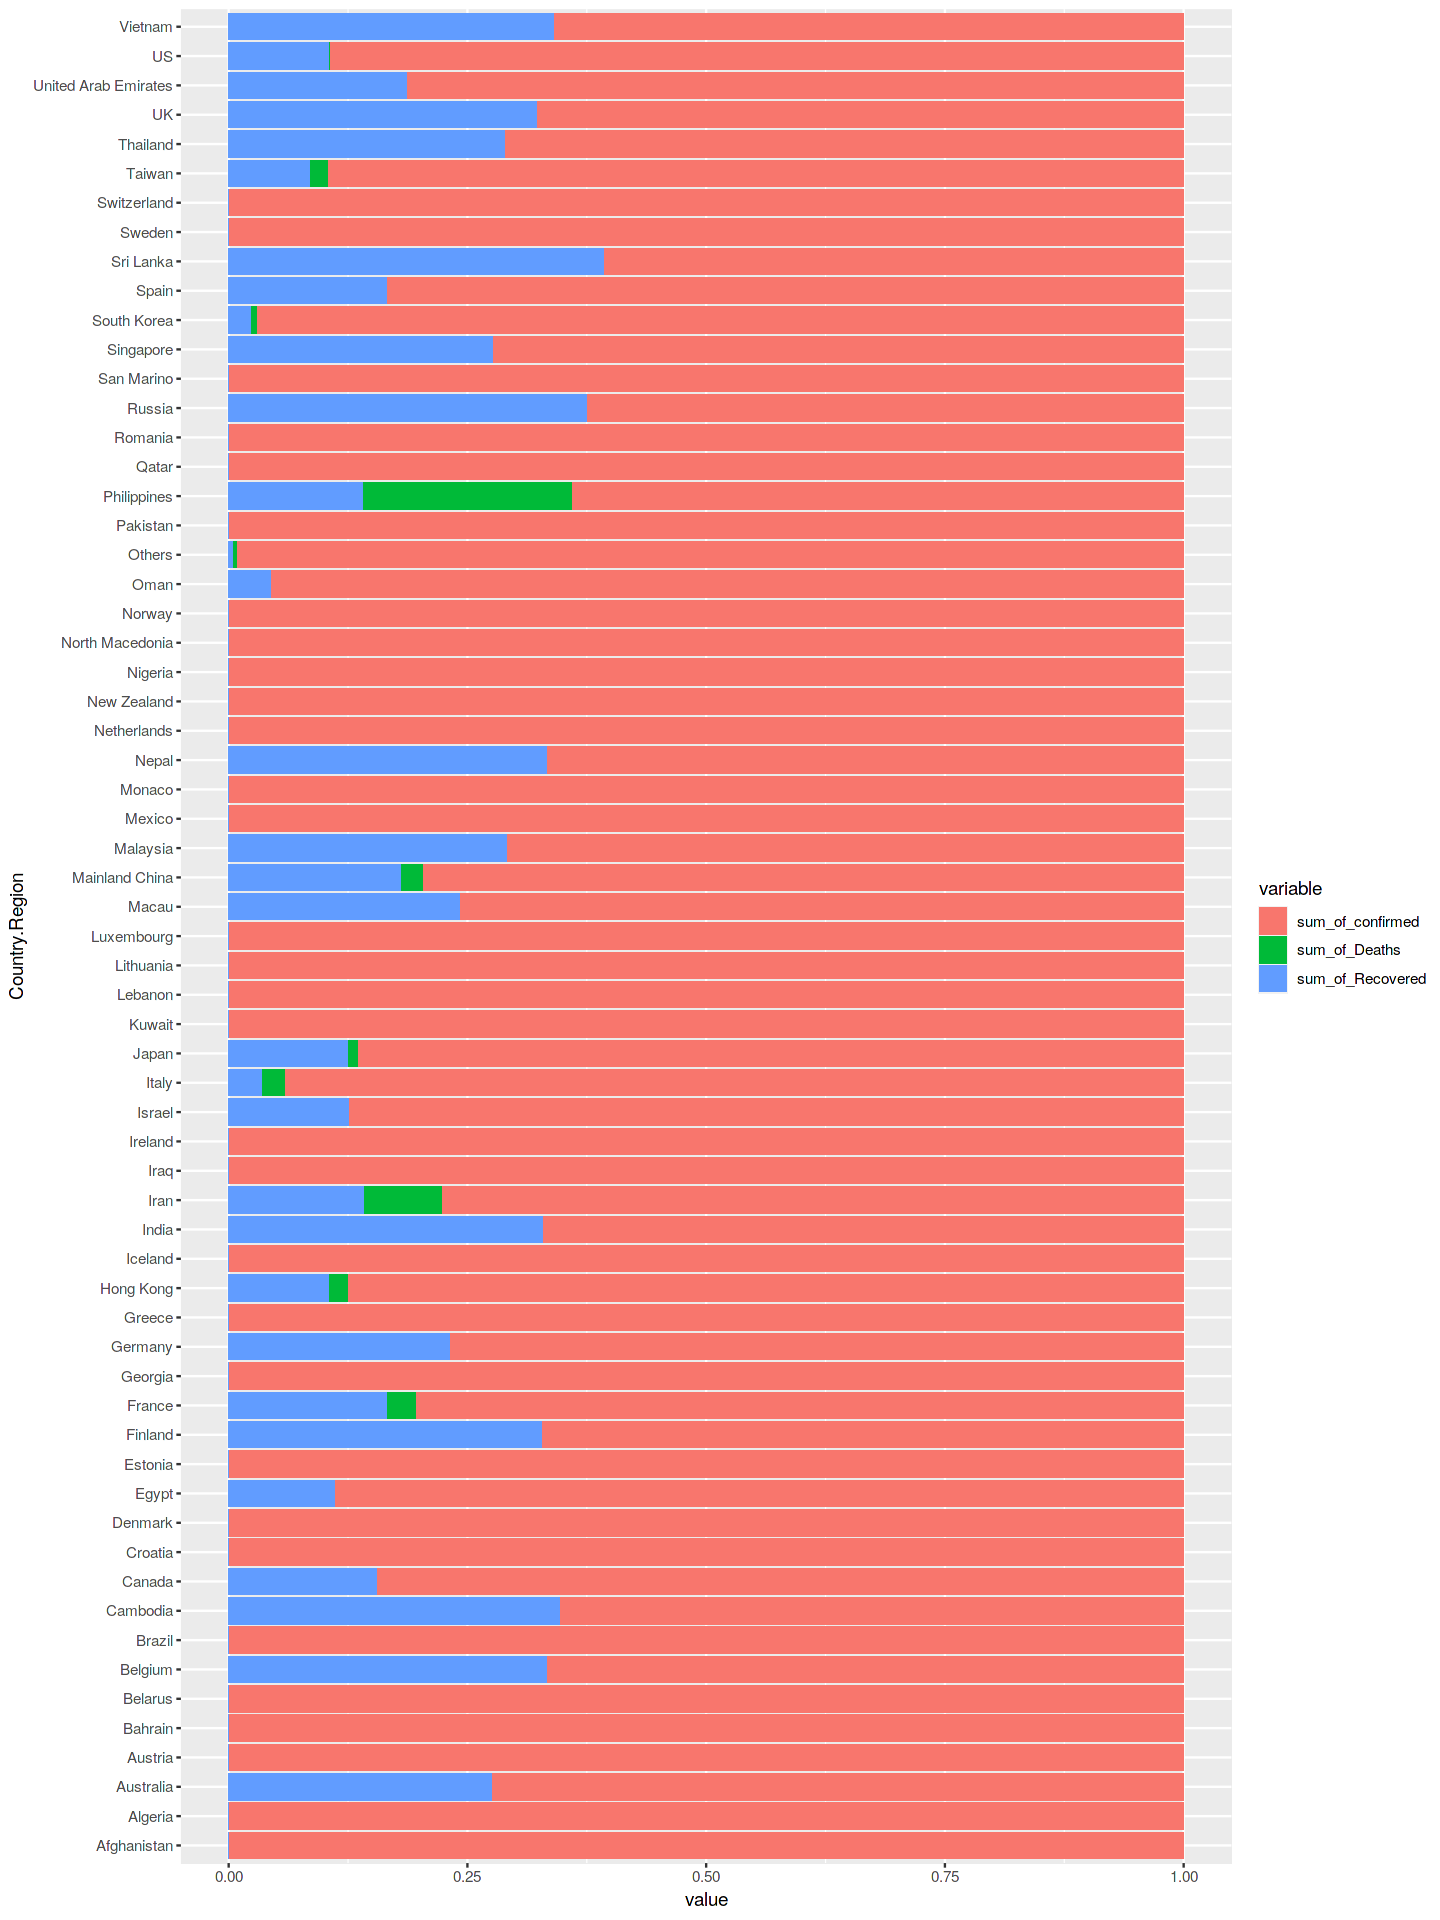

In [7]:
options(repr.plot.width = 12, repr.plot.height = 16)
bar<-ggplot(df2, aes(x=Country.Region, y=value, fill=variable))
bar+geom_bar(stat="identity", position="fill")+ coord_flip() 

In [8]:
df3<-df%>%
    select('Country.Region','Date','Confirmed','Deaths','Recovered')

In [9]:
df4<-melt(df3, id = c('Country.Region','Date'))

df4<-df4%>%
    group_by(Country.Region,Date,variable)%>%
    mutate(cum_val = cumsum(value))

The number of Chinese confirmers was so large that the visualization was done separately.

In [10]:
df5<-df4%>%
    filter(Country.Region != 'Mainland China')%>%
    group_by(Country.Region,Date,variable)%>%
    mutate(cum_val = cumsum(value))


df6<-df4%>%
    filter(Country.Region == 'Mainland China')%>%
    group_by(Country.Region,Date,variable)%>%
    mutate(cum_val = cumsum(value))

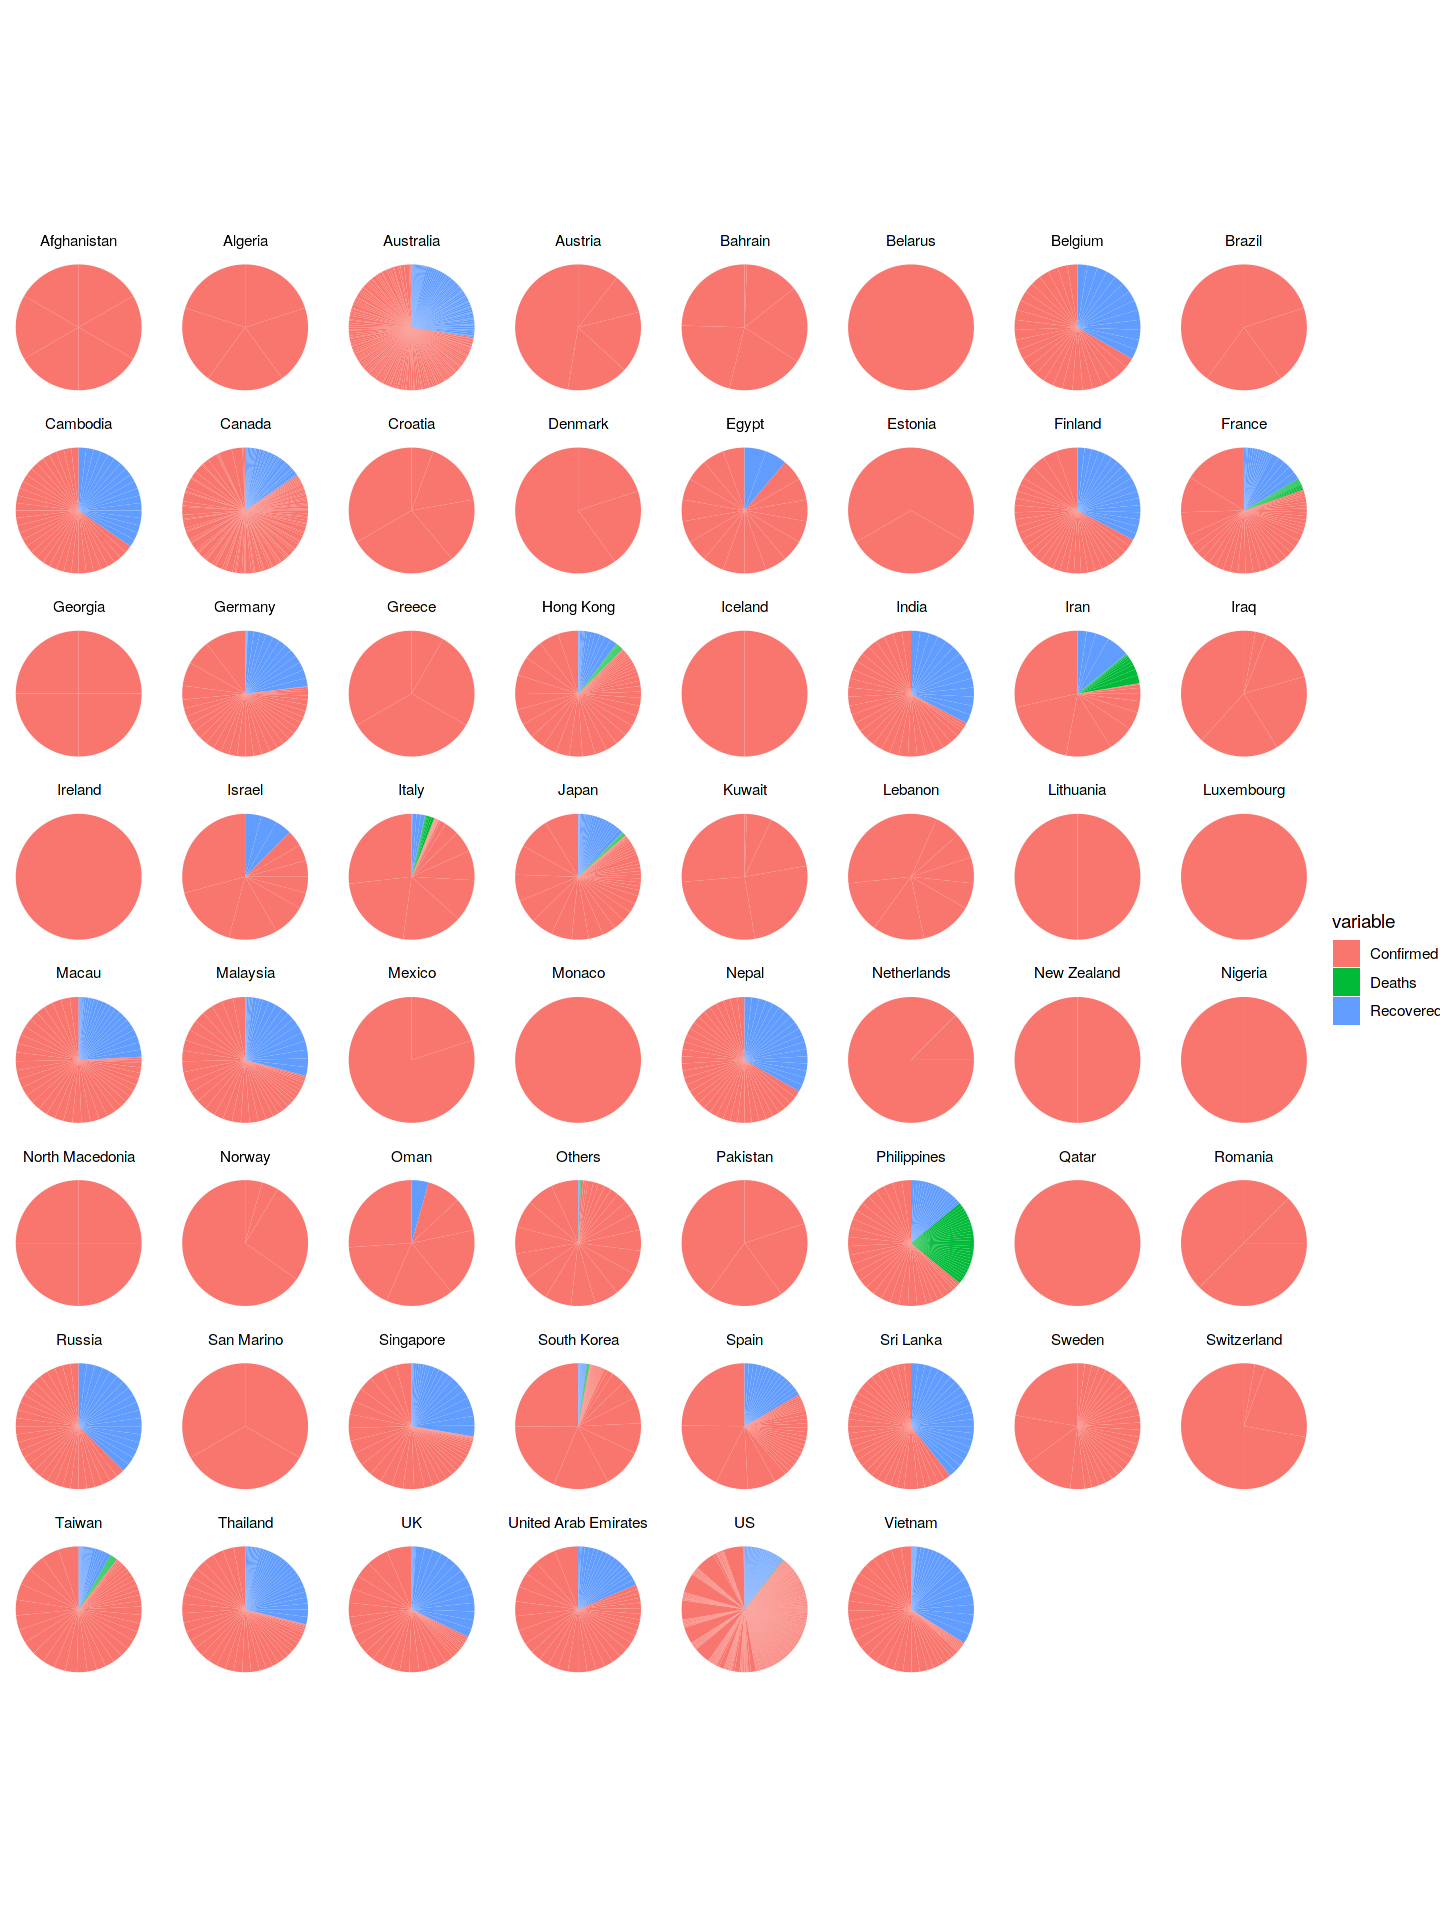

In [11]:
options(repr.plot.width = 12, repr.plot.height = 16)
bar<-ggplot(df5, aes(x="", y=value, fill=variable))
bar+geom_bar(stat="identity", width=1 ,position = position_fill())+ 
coord_polar(theta="y")+
facet_wrap(~Country.Region )+
theme_void()

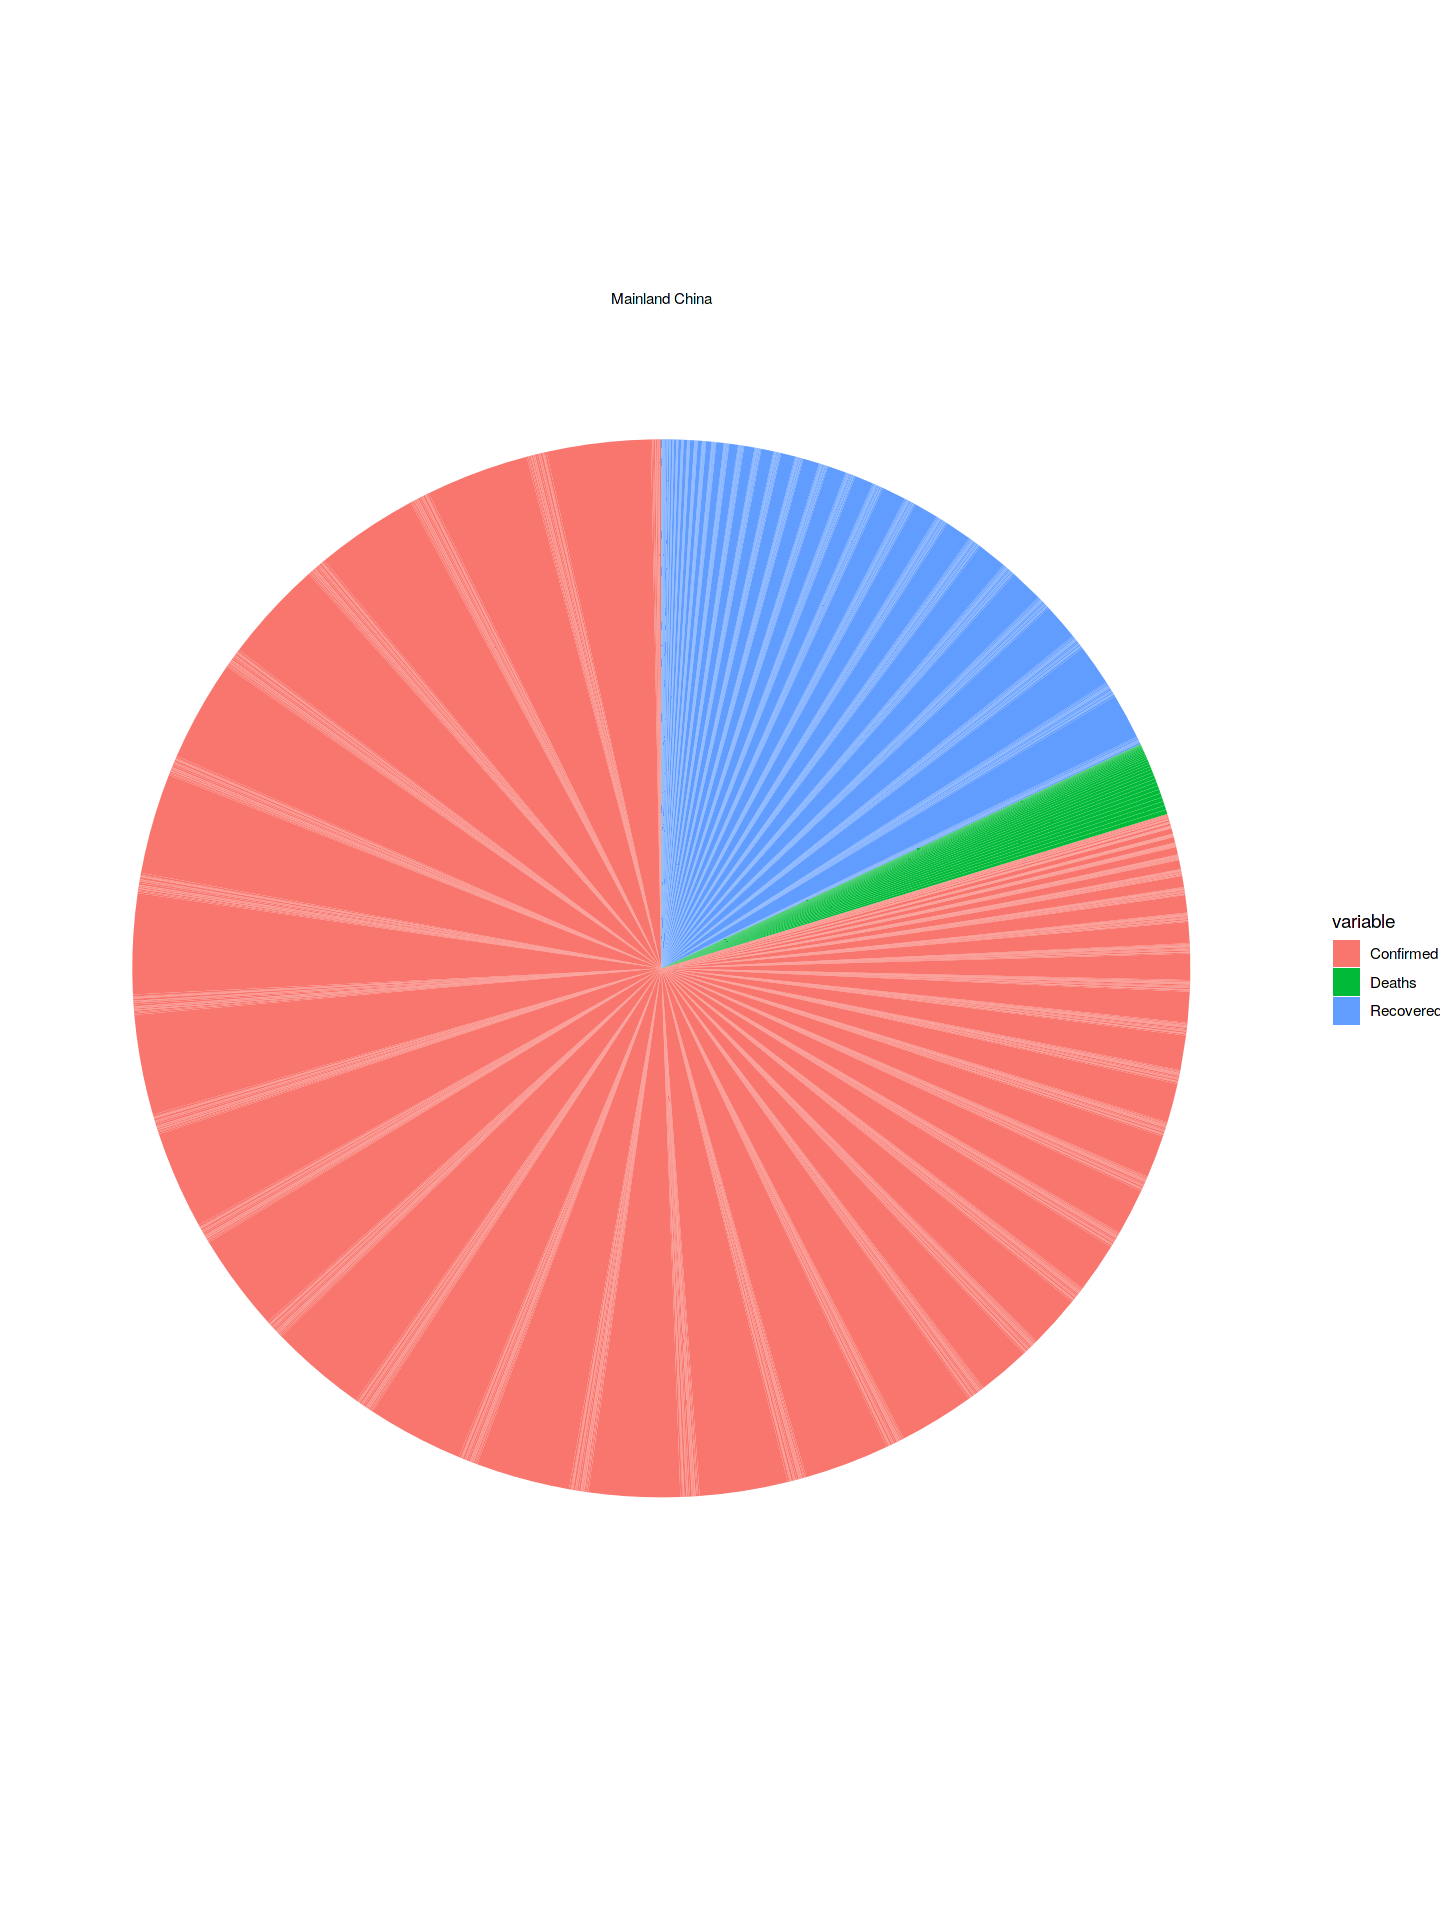

In [12]:
options(repr.plot.width = 12, repr.plot.height = 16)
bar<-ggplot(df6, aes(x="", y=value, fill=variable))
bar+geom_bar(stat="identity", width=1 ,position = position_fill())+ 
coord_polar(theta="y")+
facet_wrap(~Country.Region )+
theme_void()

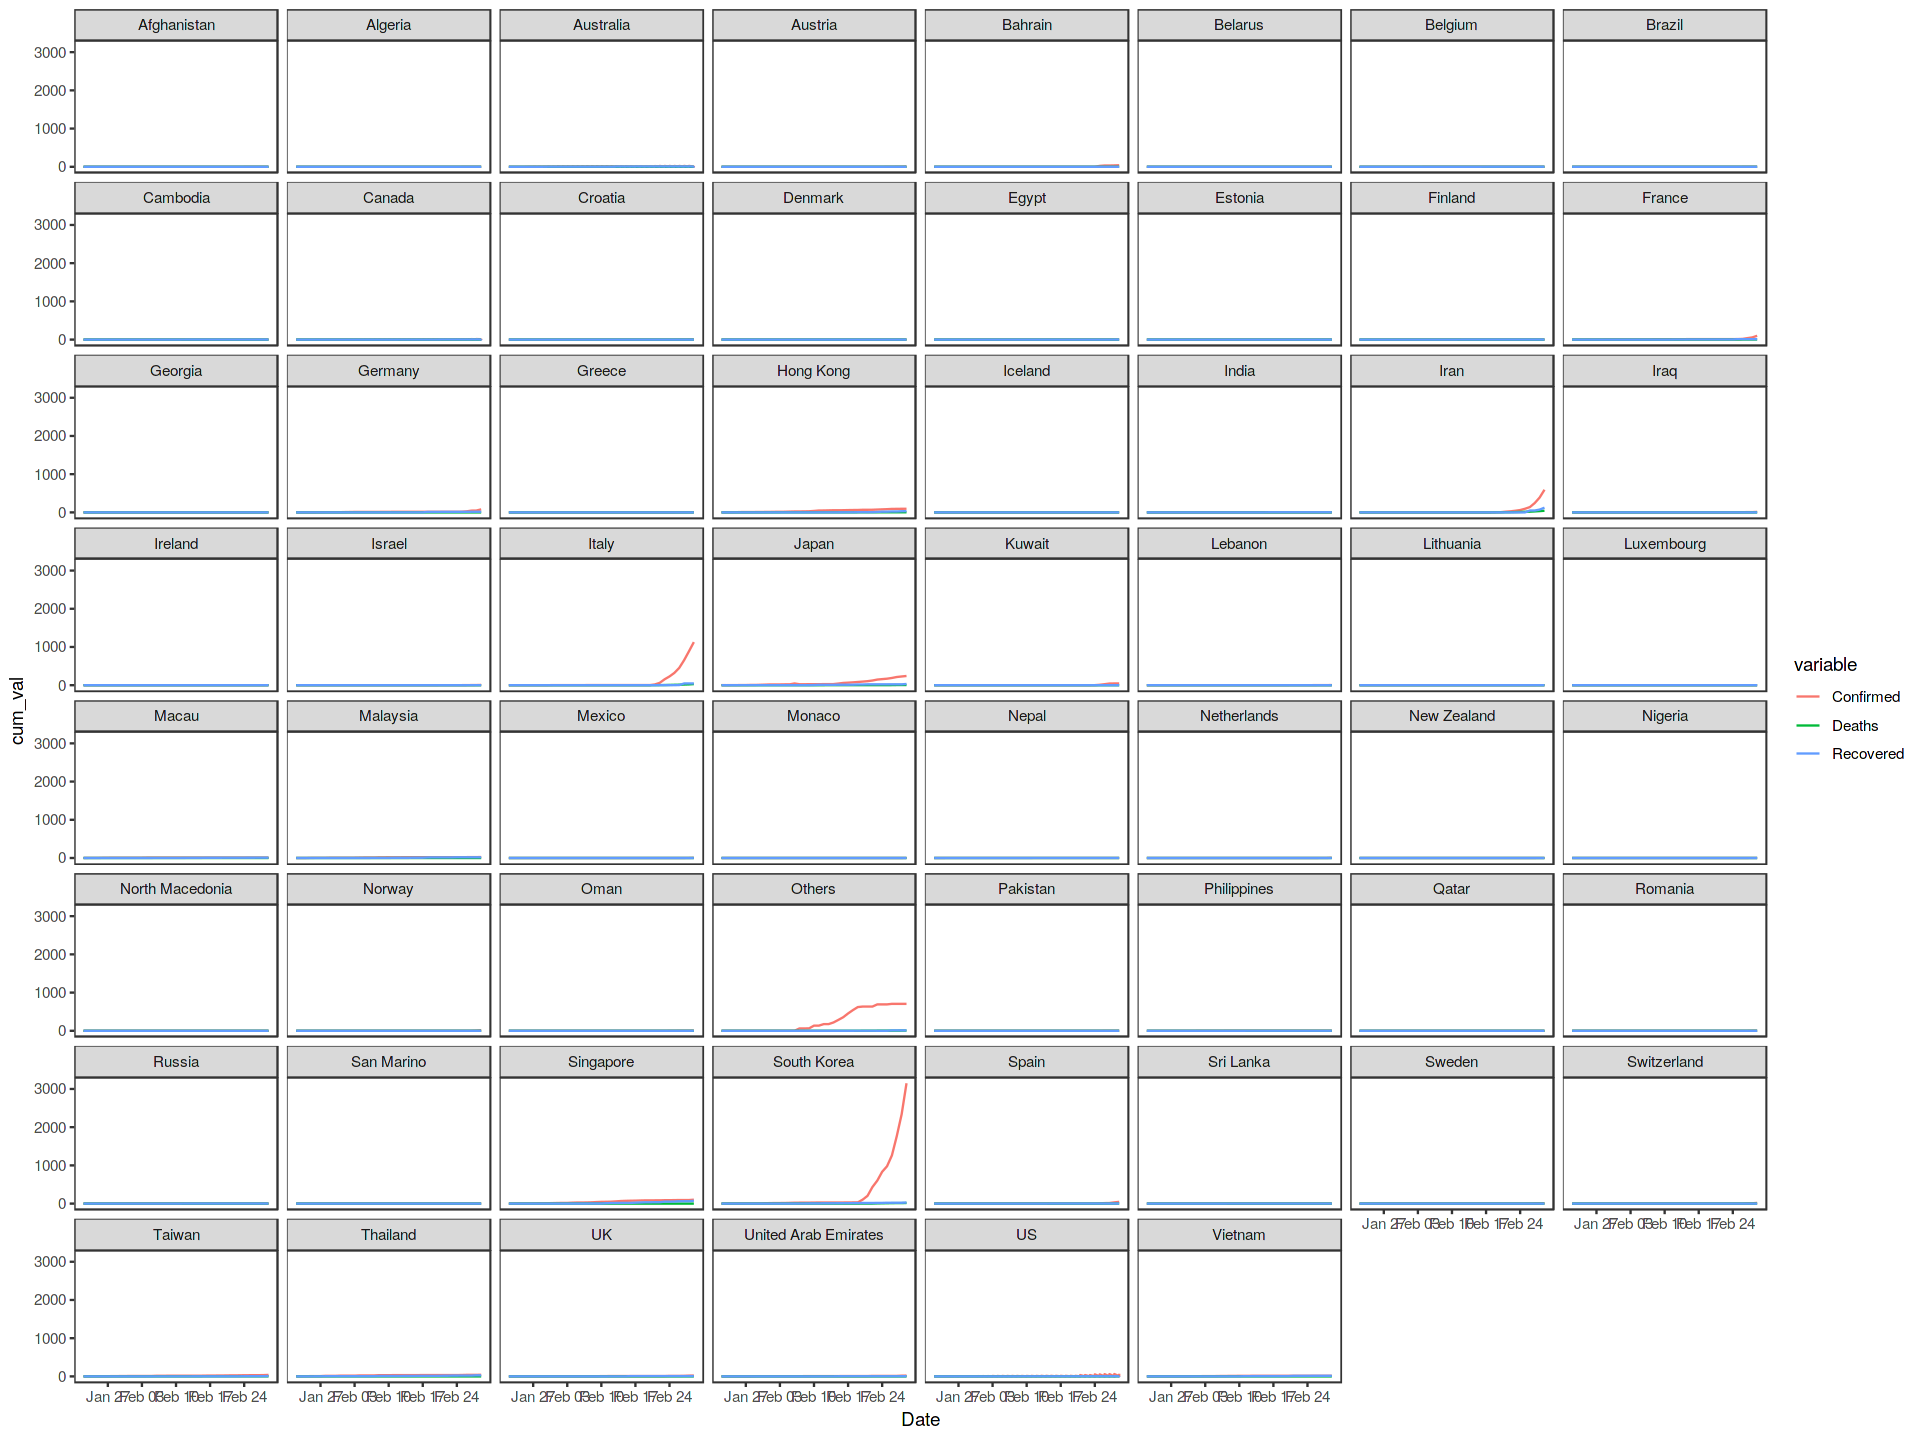

In [13]:
options(repr.plot.width = 16, repr.plot.height = 12)
ggplot(df5, aes(x=Date, y=cum_val, group = variable, color = variable ))+
 geom_line()+
  facet_wrap(~Country.Region )+
  theme_bw() +
  theme(panel.grid.major.x = element_blank(), 
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank())

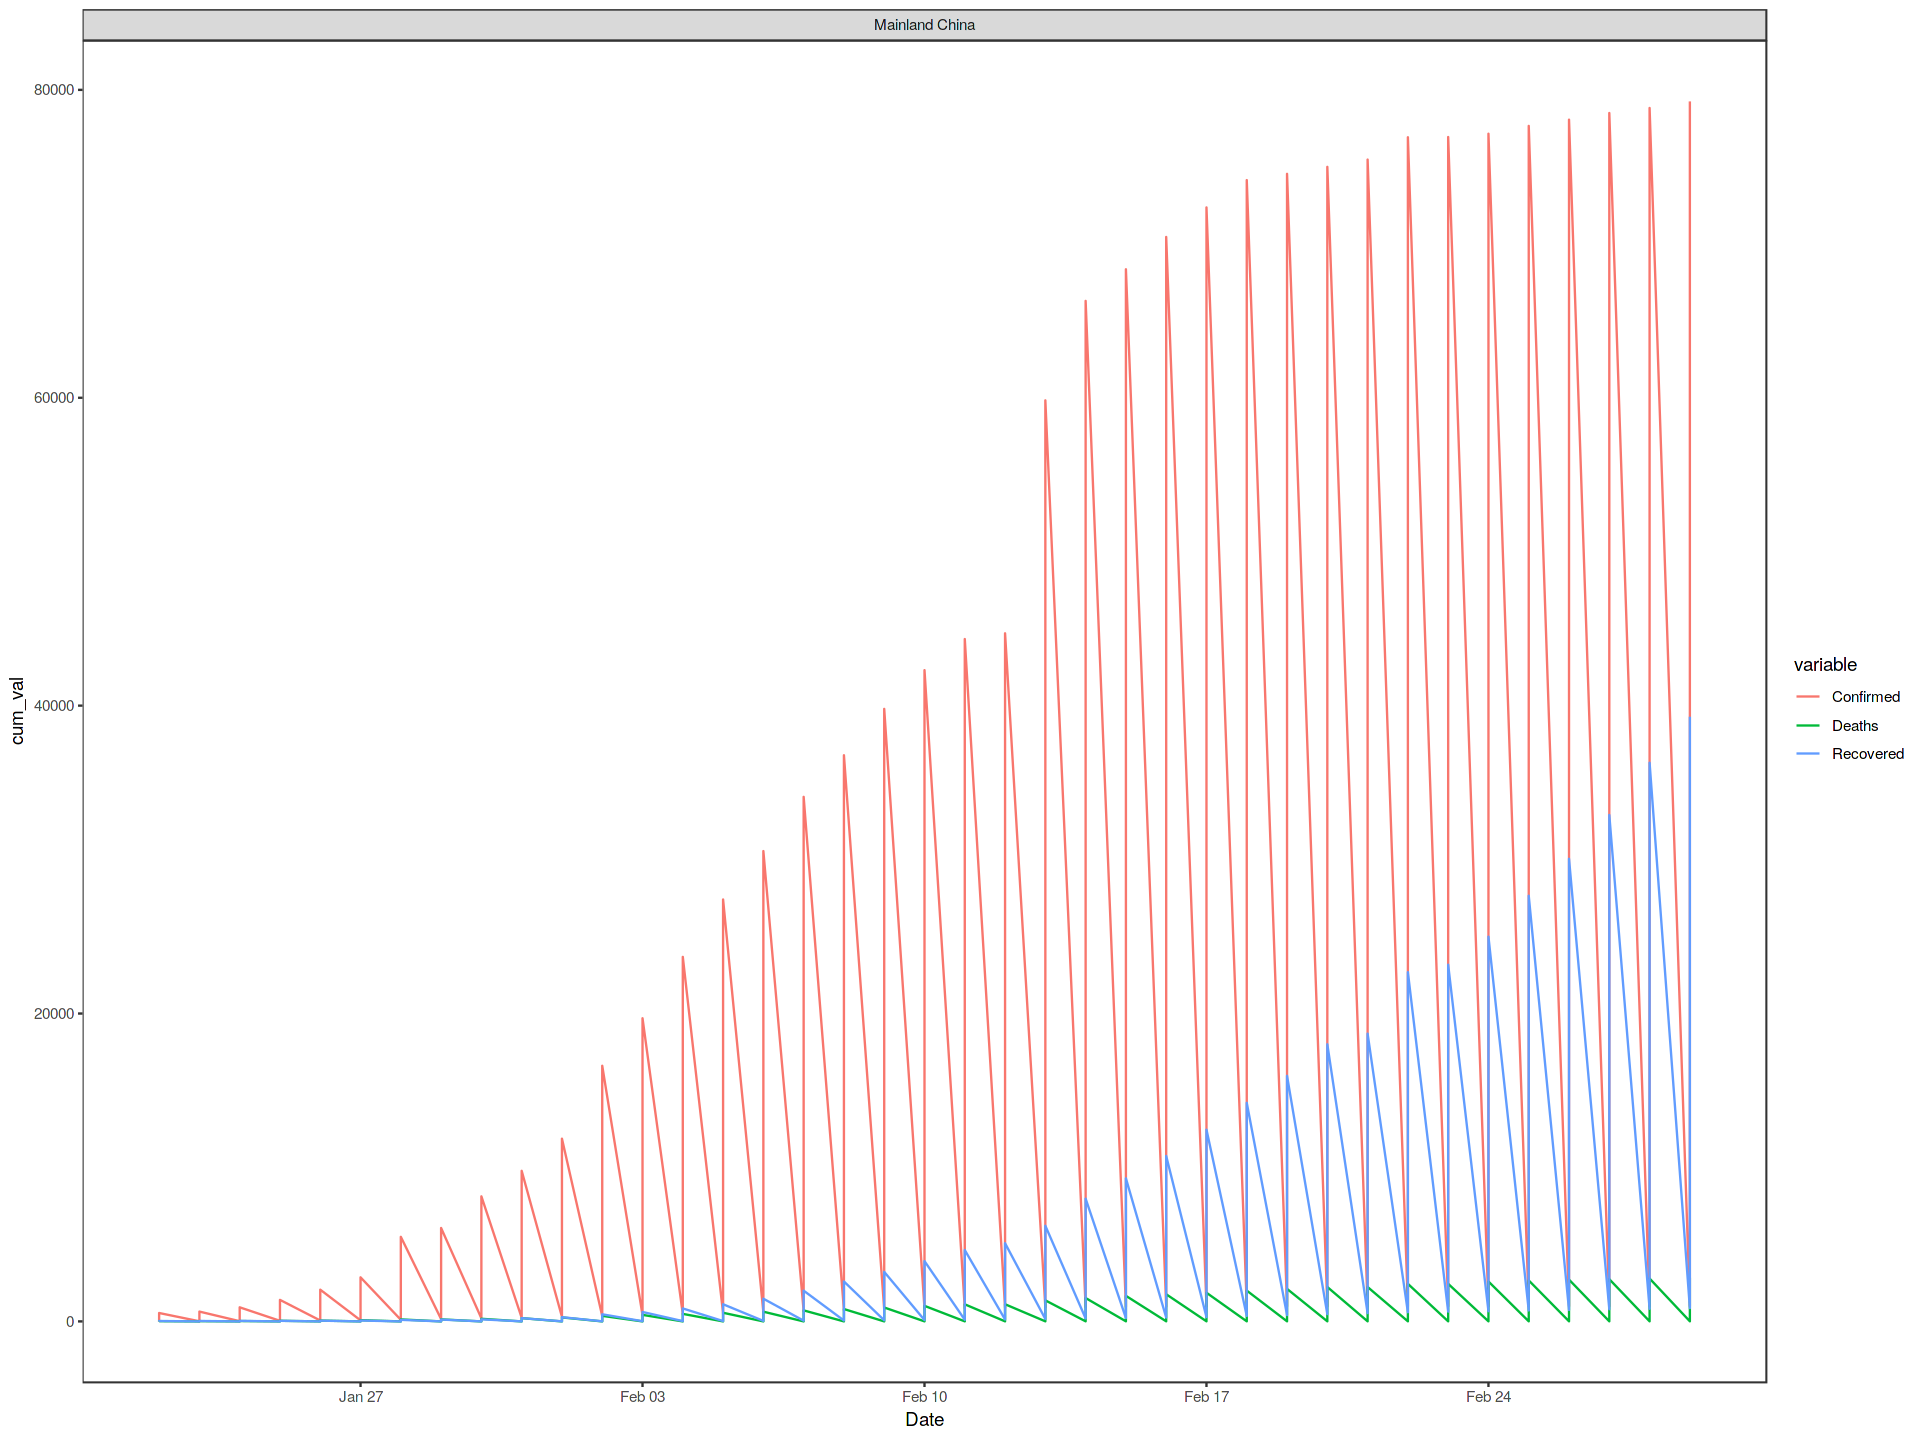

In [14]:
options(repr.plot.width = 16, repr.plot.height = 12)
ggplot(df6, aes(x=Date, y=cum_val, group = variable, color = variable ))+
 geom_line()+
  facet_wrap(~Country.Region )+
  theme_bw() +
  theme(panel.grid.major.x = element_blank(), 
        panel.grid.minor.x = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank())

# **to be continued**